# 2 - Implementation

## A) Warm up

In [ ]:
from os import linesep
import string
from collections import Counter, defaultdict
import numpy as np
import matplotlib.pyplot as plt

"""
This part requires python version 3.10 or later
"""

dataset = {'de-en-de': 'europarl-v7.de-en.lc.de',
          'de-en-en': 'europarl-v7.de-en.lc.en',
          'fr-en-fr': 'europarl-v7.fr-en.lc.fr',
          'fr-en-en': 'europarl-v7.fr-en.lc.en',
          'sv-en-sv': 'europarl-v7.sv-en.lc.sv',
          'sv-en-en': 'europarl-v7.sv-en.lc.en',}

"""
Formulating a class with the ability to load specified data as a corpus for training.  
Possible returns include: sentences and words from the data, probability for certain words to be picked from a data set, 
or the highest probabilites for n words to occure in the data set  
"""

class text_parser:
    def __init__(self, data = dataset):
        self.data = data
        self.sentences = []
        self.words = {}
        self.keys = []

    def parse(self, keys):
        self.keys = keys
        for key in keys:
            with open(self.data[key], 'r') as file:
                sentence = file.readlines()
                words = []
                for s in sentence:
                    words_in_sentence = [word for word in s.split() if word not in string.punctuation]
                    self.sentences.append(words_in_sentence)
                    words.extend(words_in_sentence)
                self.words[key] = words
        
    def count(self, n = 10):
        for key in self.keys:
            most_common = Counter(self.words[key]).most_common(n)
            print('\nFor dataset: '+str(key) +', the most common words are:')
            print(*most_common, sep = "\n")
    
    def get_words(self, all_words = True, unique = False):
        if all_words: 
            all_words = [word for words in self.words.values() for word in words]
            
            if unique: 
                return np.unique(all_words)
            else: 
                return all_words
        else: return self.words
    
    def get_sent(self, n = -1):
        if n == -1: return self.sentences
        else: return self.sentences[0:n]
  
    def prob_words(self,word_list):
        all_words = self.get_words(all_words = True)
        C = Counter(all_words)
        for word in word_list:
            if C[word] == 0: print(word+" is not used in: "+ str(self.keys) +". Giving it a probability of zero.")
            else: print("Probability of: "+ word +" in "+str(self.keys)+ " is: "+str(C[word]/C.total()))

   

In [ ]:
# Most common words
parser = text_parser()
parser.parse(['de-en-de', 'de-en-en'])
parser.count()


For dataset: de-en-de, the most common words are:
('die', 10521)
('der', 9374)
('und', 7028)
('in', 4175)
('zu', 3168)
('den', 2976)
('wir', 2863)
('daß', 2738)
('ich', 2670)
('das', 2669)

For dataset: de-en-en, the most common words are:
('the', 19847)
('of', 9597)
('to', 9059)
('and', 7303)
('in', 6237)
('is', 4478)
('that', 4441)
('a', 4435)
('we', 3372)
('this', 3362)


In [ ]:
# probabilities for speaker and zebra
parser2 = text_parser()
parser2.parse(['fr-en-en', 'de-en-en','sv-en-en'])
parser2.prob_words(['speaker','zebra'])

Probability of: speaker in ['fr-en-en', 'de-en-en', 'sv-en-en'] is: 4.23327120259538e-05
zebra is not used in: ['fr-en-en', 'de-en-en', 'sv-en-en']. Giving it a probability of zero.


## B) Language Modeling  - Bigram model  

In [ ]:
"""
Defining global methods implementing the bigram language model. 
The first creates the necessary component for the computation and 
resturns a list of bigrams and their probabilties. 

The second computes the probabilties for a sentence given the dictionary 
with probabilities from the first method. 
"""

def CalcBigramProb(data):
    listOfBigrams = []
    bigramCounts = defaultdict(int)
    unigramCounts = defaultdict(int)
    for i in range(len(data)-1):
        if i < len(data) - 1 and data[i+1]:
            bigram = (data[i], data[i + 1])
            listOfBigrams.append(bigram)
            bigramCounts[bigram] += 1
        unigramCounts[data[i]] += 1

    dictOfProb = defaultdict(lambda:1e-100)
    for bigram in listOfBigrams:
        word1, word2 = bigram
        dictOfProb[bigram] = bigramCounts[bigram] / unigramCounts[word1]
    return dictOfProb, listOfBigrams, unigramCounts, bigramCounts

def calcSentenceProb(sentence, dictOfProb):
    prob = 1
    min_prob = min(dictOfProb.values()) #Find the probability of the least common bigram

    for i in range(len(sentence)-1):
        bigram = (sentence[i], sentence[i+1])
        if bigram in dictOfProb:
            prob *= dictOfProb[bigram]
        else:
            prob *= (min_prob/100) #Give non-existent bigrams a symbolic probability
    return prob


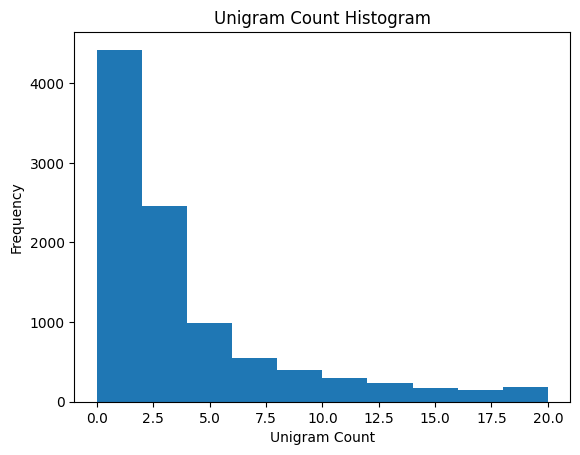

In [ ]:
# Getting all the print we need to anser questions
parser_english = text_parser()
parser_english.parse(['fr-en-en']) # Removed the two identical other english corpuses: 'de-en-en','sv-en-en'
data = parser_english.get_words()

listOfProb, listOfBigrams, unigramCounts, bigramCounts = CalcBigramProb(data)

plt.hist(list(unigramCounts.values()), bins =10, range=(0,20))
plt.xlabel("Unigram Count")
plt.ylabel("Frequency")
plt.title("Unigram Count Histogram")
plt.show()


In [ ]:
#printing a long, a short and a sentence with all missing words
long_sentence = parser_english.get_sent(n=10)[0]
print(long_sentence)
prob = calcSentenceProb(long_sentence, listOfProb)
print("The probability of the long sentence is "+str(prob) + "\n")

short_sentence = parser_english.get_sent(n=10)[6]
print(short_sentence)
prob = calcSentenceProb(short_sentence, listOfProb)
print("The probability of the short sentence is "+str(prob) + "\n")

missing_word_sentence = ['denna', 'mening' ,'innehåller', 'flera', 'ord', 'som', 'saknas' ,'.']
print(missing_word_sentence)
prob = calcSentenceProb(missing_word_sentence, listOfProb)
print("The probability of the missing-word-sentence is "+str(prob) + "\n")


['i', 'declare', 'resumed', 'the', 'session', 'of', 'the', 'european', 'parliament', 'adjourned', 'on', 'friday', '17', 'december', '1999', 'and', 'i', 'would', 'like', 'once', 'again', 'to', 'wish', 'you', 'a', 'happy', 'new', 'year', 'in', 'the', 'hope', 'that', 'you', 'enjoyed', 'a', 'pleasant', 'festive', 'period']
The probability of the long-sentence is 9.07857251669651e-56

['madam', 'president', 'on', 'a', 'point', 'of', 'order']
The probability of the short sentence is 1.1291931208789064e-10

['denna', 'mening', 'innehåller', 'flera', 'ord', 'som', 'saknas', '.']
The probability of the missing_word_sentence is 2.450380541500717e-28



In [ ]:
#example of a sentence with 100+ words 
long_sentence1 = parser_english.get_sent(n=10)[0]
long_sentence2 = parser_english.get_sent(n=10)[1]
long_sentence3 = parser_english.get_sent(n=10)[3]
joinedlist = long_sentence1 + long_sentence2 +long_sentence3
print(len(joinedlist))
print(joinedlist)
prob = calcSentenceProb(joinedlist, listOfProb)
print("The probability of the long-sentence is "+str(prob) + "\n")

112
['i', 'declare', 'resumed', 'the', 'session', 'of', 'the', 'european', 'parliament', 'adjourned', 'on', 'friday', '17', 'december', '1999', 'and', 'i', 'would', 'like', 'once', 'again', 'to', 'wish', 'you', 'a', 'happy', 'new', 'year', 'in', 'the', 'hope', 'that', 'you', 'enjoyed', 'a', 'pleasant', 'festive', 'period', 'although', 'as', 'you', 'will', 'have', 'seen', 'the', 'dreaded', '&apos;', 'millennium', 'bug', '&apos;', 'failed', 'to', 'materialise', 'still', 'the', 'people', 'in', 'a', 'number', 'of', 'countries', 'suffered', 'a', 'series', 'of', 'natural', 'disasters', 'that', 'truly', 'were', 'dreadful', 'in', 'the', 'meantime', 'i', 'should', 'like', 'to', 'observe', 'a', 'minute', '&apos;', 's', 'silence', 'as', 'a', 'number', 'of', 'members', 'have', 'requested', 'on', 'behalf', 'of', 'all', 'the', 'victims', 'concerned', 'particularly', 'those', 'of', 'the', 'terrible', 'storms', 'in', 'the', 'various', 'countries', 'of', 'the', 'european', 'union']
The probability of t

## C) Translation modeling

In [ ]:
"""
Class for translation model. Holds srouce language as "original" language parsers 
and the target language as "translation" parsers. 

Has a couple of class specific helper methods for computing translation probabities, 
for getting the n most likly translations for a specific word. 
"""

class translationModel: 
    def __init__(self, orig_lang, trans_lang):
        #Initiate "orignal" & "translated" data
        orig_parser = text_parser()
        trans_parser = text_parser()

        #Parse "orignal" & "translated" data
        orig_parser.parse(orig_lang)
        trans_parser.parse(trans_lang)

        self.orig_sent = orig_parser.get_sent()
        self.trans_sent = trans_parser.get_sent()
        #self.trans_probs = None

        self.orig_words = orig_parser.get_words(all_words=True, unique = True)
        self.trans_words = trans_parser.get_words(all_words=True, unique = True)
        
    def calculate_translation_probs(self, n_iter=5, small_value = 0.0001, print_it = False):
        #initiate transition probabilities to some small value
        self.trans_probs = defaultdict(lambda: defaultdict(lambda: small_value))
      
        #Define # of EM iterations 
        for i in range(1,n_iter+1): 

            #Set all counts c(o,t) and c(t) to 0
            ot_count = defaultdict(lambda: defaultdict(lambda: small_value))
            o_count = defaultdict(lambda: small_value)

            #For each sentence pair
            for o_words, t_words in zip(self.orig_sent,self.trans_sent):

                #Include NULL word to original sentence
                o_words += ["NULL"]

                #For each original word
                for t_word in t_words:

                    #Get transition probability sum
                    tp_sum = 0

                    for o_word in o_words:
                        tp_sum+=self.trans_probs[o_word][t_word]

                    #For each translated word (and null word)
                    for o_word in o_words:

                        #Compute alignment probability
                        align_prob = self.trans_probs[o_word][t_word]/tp_sum

                        #Update Pseudocount of c(o,t)
                        ot_count[o_word][t_word] += align_prob

                        #Update Pseudocount of c(t)
                        o_count[o_word] += align_prob

            # Reestimate transition probabilities
            for o_word, ot_dict in ot_count.items():
                for t_word, _ in ot_dict.items():
                    self.trans_probs[o_word][t_word] = ot_count[o_word][t_word] / o_count[o_word]

            if print_it:
                print("\nIteration: "+str(i))
                print(*model.get_similar_words(word="european",word_type = 'original'), sep ="\n")

    def get_similar_words(self, word, word_type, n = 10):
        if word_type == 'original':
            word_probs = list(self.trans_probs[word].items())
            word_probs.sort(key=lambda x: x[1], reverse=True)
            return word_probs[:n]

        elif word_type == 'translated':
            word_probs = dict((o_word, self.trans_probs[o_word][word]) for o_word,_ in self.trans_probs.items())
            word_probs_sort = sorted(word_probs.items(), key=lambda x: x[1], reverse=True)
            return word_probs_sort[:n]
        
        else: print('ERROR OCCURED')

In [ ]:
# Getting the 10 most likely words for "eruopean" 
#in the first 5 iterations of an EM implementation 
model = translationModel(['sv-en-en'],['sv-en-sv'])
model.calculate_translation_probs(print_it = True)


Iteration: 1
('att', 0.0362214897562652)
('och', 0.03095154803798135)
('i', 0.029531636096674897)
('europeiska', 0.02840547757361904)
('det', 0.02249447184690552)
('för', 0.021496130225364684)
('som', 0.020441265076782872)
('en', 0.019293034915310873)
('av', 0.018365282213587533)
('den', 0.01634767250420828)

Iteration: 2
('europeiska', 0.18716617143717182)
('att', 0.05092837395086519)
('i', 0.050014895787606345)
('och', 0.04718332673523597)
('en', 0.03176741755190454)
('för', 0.03148262798628154)
('det', 0.03063164177268362)
('unionen', 0.030105253582269547)
('som', 0.028804984984470768)
('den', 0.02821106895671469)

Iteration: 3
('europeiska', 0.4353514578216671)
('i', 0.04373888108436969)
('att', 0.03691149485584044)
('och', 0.03689220647599021)
('europeisk', 0.03572585258309753)
('unionen', 0.032830876840466074)
('en', 0.027431468975982413)
('den', 0.026323067476550686)
('europaparlamentet', 0.024588704784839766)
('för', 0.02442261866360876)

Iteration: 4
('europeiska', 0.61652755

## D) Decoding

In [ ]:
#Initiate parser
parser = text_parser()
parser.parse(['sv-en-sv', 'sv-en-en'])
unique_words = parser.get_words(all_words = True, unique = True)#.items()

#Initiate bigram
listOfProb, listOfBigrams, unigramCounts, bigramCounts = CalcBigramProb(parser.get_words())

#Initiate translation model
model = translationModel(['sv-en-sv'],['sv-en-en'])
model.calculate_translation_probs()

#Choose sentence to translate
#sentence =  "jag förklarar europaparlamentets session återupptagen efter avbrottet den 17 december"


In [116]:
word_list = parser.get_sent()[20]#sentence.split()

translation=[] # for holding the translation

# loop all words in that sentence
for i, word_i in enumerate(word_list):
    if word_i not in unique_words: 
        print(f"Error message: '{word}' not contained in vocabulary!")
    if not translation:
        print('First word is just added!')
        translation.append(model.get_similar_words(word=word_i,word_type = 'original')[0][0])
        continue
    else:
        max_prob = 0
        best_word = ""
        
        contenders = model.get_similar_words(word=word_i,word_type = 'original',n = 5)

        #Delete # to see hybrid 
        for word in contenders:
            tot_prob = word[1]#*(listOfProb[(translation[i-1],word[0])]*1e-30)
            if tot_prob > max_prob: 
                max_prob = tot_prob
                best_word = word[0]
        translation.append(best_word)

print(word_list)
print(translation)
print(calcSentenceProb(translation, listOfProb))


First word is just added!
['tack', 'herr', 'segni', 'det', 'skall', 'jag', 'gärna', 'göra']
['thank', 'mr', 'segni', 'it', 'should', 'i', 'like', 'do']
4.1234050811076e-311


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=27527141-1c2d-41eb-a7d6-3699f108d4e9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>